In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df["name"].nunique()

1491

In [6]:
df.shape

(4340, 8)

In [9]:
label=LabelEncoder()
for i in df[["name","fuel","seller_type","transmission","owner"]]:
    df[i]=label.fit_transform(df[i])

In [10]:
df.dtypes

name             int64
year             int64
selling_price    int64
km_driven        int64
fuel             int64
seller_type      int64
transmission     int64
owner            int64
dtype: object

<Axes: >

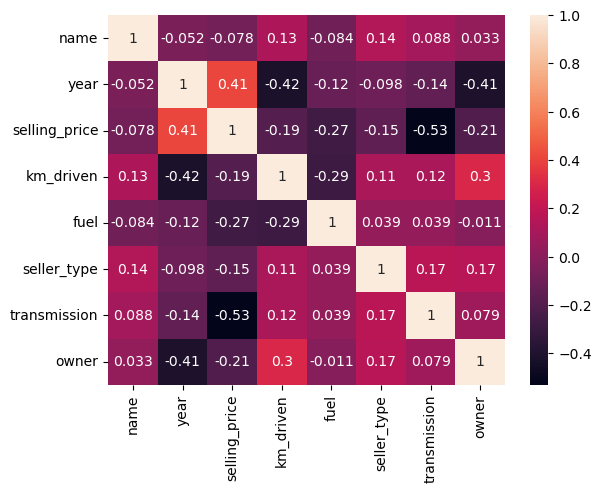

In [11]:
sns.heatmap(df.corr(),annot=True)

In [15]:
x=df.drop(columns=["selling_price"])
y=df["selling_price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [19]:
param_grid={
    "n_estimators":[100,200],
    "learning_rate":[0.1,0.5,0.01],
    "max_depth":[2,3,4]
}
grid=GridSearchCV(GradientBoostingRegressor(),cv=5,param_grid=param_grid,scoring="neg_root_mean_squared_error")
grid.fit(x_train,y_train)
print("best parameter:",grid.best_params_)
print("best accuracy score:",grid.best_score_)
model=grid.best_estimator_
y_pred=model.predict(x_test)
print("root mean squared error:",root_mean_squared_error(y_test,y_pred))
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))

best parameter: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}
best accuracy score: -214591.53593205038
root mean squared error: 297727.8197244492
mean absolute error: 96598.1296820011
mean squared error: 88641854637.87411
